In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
billboard=pd.read_excel('/content/BillBoard_Features.xls')
msd=pd.read_excel('/content/MSD_Features.xls')
billboard.head()

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.200,0.34900,0.0,0.340,0.218,83.903,239836,-7.230
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.040,0.33100,0.0,0.135,0.341,145.038,231267,-5.804
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.292,0.08520,0.0,0.534,0.389,112.511,145543,-6.903
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.222,0.00513,0.0,0.124,0.446,155.008,312820,-3.714
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.463,0.01690,0.0,0.124,0.152,120.274,203418,-5.114


**Adding the target feature**

In [ ]:
ind1=[]
ind2=[]
for i in msd.index:
    for j in billboard.index:
        if msd[5][i]==billboard['SpotifyID'][j]:
            ind1.append(i)
            billboard=billboard.drop(j,axis=0,inplace=False)
            break
hit1=[0]*5603
for i in range(len(ind1)):
    hit1[ind1[i]]=1  

In [ ]:
msd.insert(18,"billboard_hit",hit1, True) 
msd.head()

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,billboard_hit
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,0
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,0
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,0
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,0
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,0


**Preprocessing**

In [ ]:
billboard.isnull().sum()
billboard[billboard.Artist.isnull()].index
billboard[billboard.Track.isnull()].index
billboard=billboard.dropna()

In [ ]:
msd.isnull().sum()
msd=msd.rename(columns={'0':"Artist",'1':"Album",'2':"Song",'3':"Year",'4':"MS_ID",'5':"SpotifyID"})

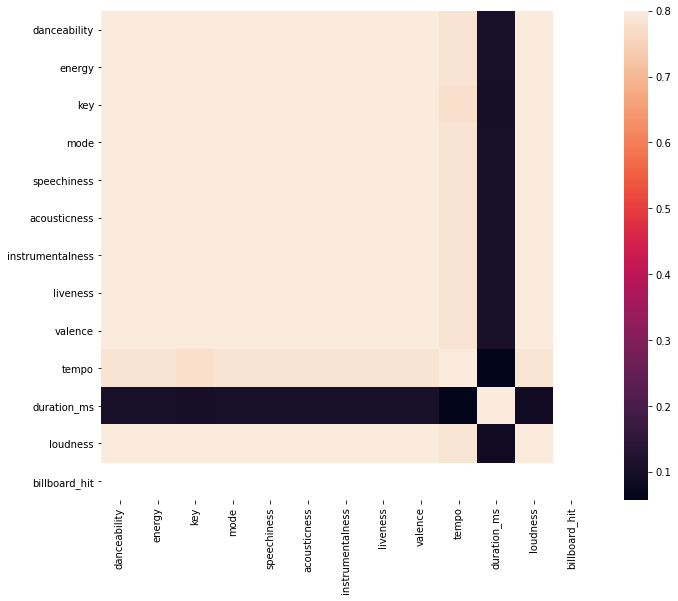

In [ ]:
hit=[1]*billboard.shape[0]
billboard.insert(15,'billboard_hit',hit,True)
correlation_matrix = billboard.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

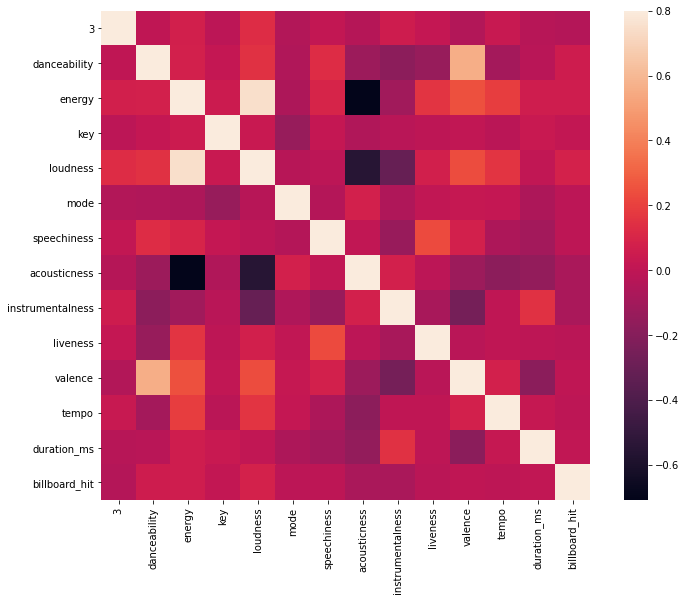

In [ ]:
correlation_matrix = msd.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

In [ ]:
billboard['SpotifyID'].value_counts()
duplicate = billboard[billboard.duplicated()]
duplicate

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,billboard_hit


In [ ]:
msd[5].value_counts()
duplicate1 = msd[msd.duplicated()]
duplicate1

,0,1,2,3,4,5,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,billboard_hit


In [ ]:
billboard[billboard['SpotifyID']=='3aiKybRCTBazAplseCewQc'].index
for i in billboard[billboard['SpotifyID']=='3aiKybRCTBazAplseCewQc'].index:
  print(billboard['Track'][i]+" "+billboard["Artist"][i])
billboard=billboard.drop_duplicates(subset='SpotifyID', keep="last")
billboard['SpotifyID'].value_counts()

One Less Bell To Answer / A House Is Not A Home Glee Cast Featuring Kristin Chenoweth
A House Is Not A Home Glee Cast
Home Glee Cast Featuring Kristin Chenoweth


3sBuuFbaRBvFJWkd4Qgv7W    1
3DamFFqW32WihKkTVlwTYQ    1
0sTyPK3qbH0u7dFJsEHQYm    1
1zng9uqqXoPkmU05nsAlsw    1
3KwwE4sgCzMaKWq6QBebmX    1
                         ..
7nD9nN3jord9wWcfW3Gkcm    1
54y3b2yo4FWfgVB6aN46JP    1
2GGXna7FXpFGhFfeuCijZ0    1
7aOH8ShpP7P64x9fyTHxyc    1
2D52zjCyqEIQa221lhw6uk    1
Name: SpotifyID, Length: 9188, dtype: int64

In [ ]:
msd=msd.drop_duplicates(subset=5, keep="last")
msd[5].value_counts()
billboard

,Track,Artist,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,billboard_hit
0,Lucid Dreams,Juice WRLD,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,239836,-7.230,1
1,Better Now,Post Malone,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,231267,-5.804,1
2,Drip Too Hard,Lil Baby & Gunna,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.2920,0.08520,0.000000,0.5340,0.389,112.511,145543,-6.903,1
3,Sicko Mode,Travis Scott,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820,-3.714,1
4,Youngblood,5 Seconds Of Summer,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418,-5.114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,Me So Horny,The 2 Live Crew,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,1,1,0.0986,0.00336,0.000500,0.0833,0.949,132.737,260441,-11.157,1
9325,Pump Up The Jam,Technotronic Featuring Felly,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,10,0,0.1150,0.02390,0.000000,0.0491,0.675,124.810,215040,-7.375,1
9326,Got To Have Your Love,Mantronix Featuring Wondress,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,10,0,0.0753,0.17900,0.001070,0.0497,0.960,105.632,383333,-13.669,1
9327,All Nite,Entouch Featuring Keith Sweat,6q989QMsV87X9Em9J6DONi,0.834,0.485,11,1,0.0453,0.04780,0.000051,0.1030,0.929,107.598,368467,-13.040,1


**Visualizing the data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


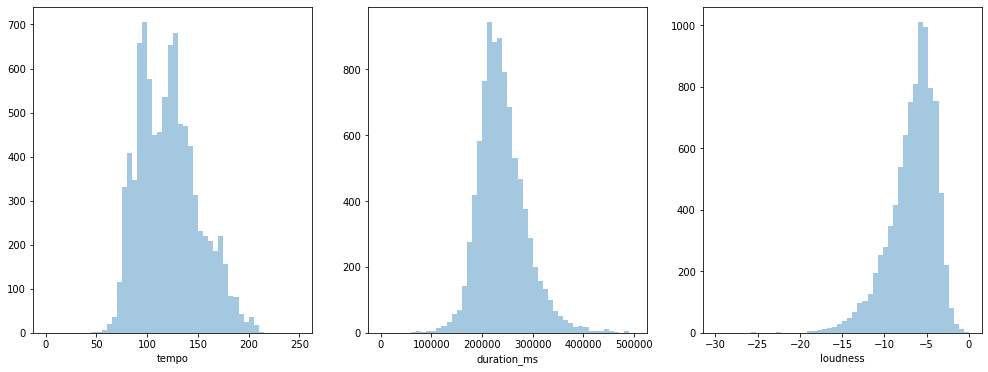

In [ ]:
f,axes=plt.subplots(ncols=3,figsize=(17,6))
sns.distplot(a=billboard['tempo'],ax=axes[0],kde=False,hist_kws={"range": [0,250]})
sns.distplot(a=billboard['duration_ms'],ax=axes[1],kde=False,hist_kws={"range": [0,500000]})
sns.distplot(a=billboard['loudness'],ax=axes[2],kde=False,hist_kws={"range": [-30,0]})

We could see that most of the values lie between 100000 and 400000 ms in duration_ms and it gradually increases from the leftmost and rightmost ranges. Same follows with loudness which also gradually increases from both the ranges.

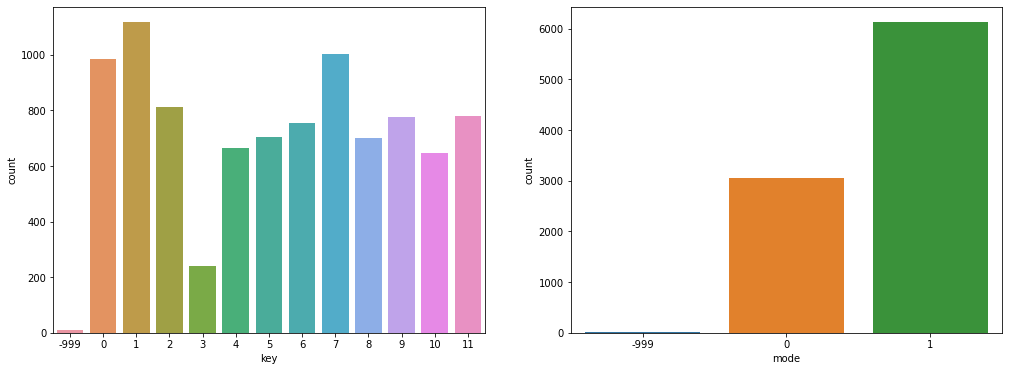

In [ ]:
f,axes=plt.subplots(ncols=2,figsize=(17,6))
sns.countplot(x='key',data=billboard,ax=axes[0])
sns.countplot(x='mode',data=billboard,ax=axes[1])

We could see that in mode feature majority of the values are 1 and in key feature '1' is the majorly occured key. We could also see that there are some -999 values which is also considered as NULL values.

In [ ]:
print(billboard[billboard['key']==-999.0].index)
print(billboard[billboard['mode']==-999.0].index)
print(billboard[billboard['energy']==-999.0].index)
print(billboard[billboard['acousticness']==-999.0].index)
print(billboard[billboard['instrumentalness']==-999.0].index)
print(billboard[billboard['speechiness']==-999.0].index)

Int64Index([536, 1200, 1520, 1535, 1626, 1675, 1966, 2166, 3569, 7695], dtype='int64')
Int64Index([536, 1200, 1520, 1535, 1626, 1675, 1966, 2166, 3569, 7695], dtype='int64')
Int64Index([536, 1200, 1520, 1535, 1626, 1675, 1966, 2166, 3569, 7695], dtype='int64')
Int64Index([536, 1200, 1520, 1535, 1626, 1675, 1966, 2166, 3569, 7695], dtype='int64')
Int64Index([536, 1200, 1520, 1535, 1626, 1675, 1966, 2166, 3569, 7695], dtype='int64')
Int64Index([536, 1200, 1520, 1535, 1626, 1675, 1966, 2166, 3569, 7695], dtype='int64')


In [ ]:
billboard=billboard.drop(billboard[billboard['speechiness']==-999.0].index,axis=0)
print(billboard[billboard['instrumentalness']==-999.0].index)

Int64Index([], dtype='int64')


In [ ]:
print(msd[msd['key']==-999.0].index)
print(msd[msd['mode']==-999.0].index)
print(msd[msd['energy']==-999.0].index)
print(msd[msd['acousticness']==-999.0].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


Dropped the columns with values containing -999 because it does not contain the information regarding the song. Dropped about 10 columns with this information.

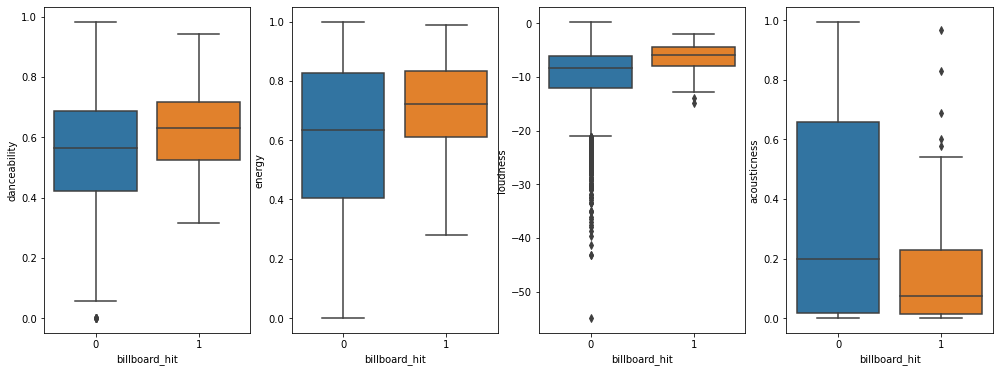

In [ ]:
f,axes=plt.subplots(ncols=4,figsize=(17,6))
sns.boxplot(x='billboard_hit',y='danceability',ax=axes[0],data=msd)
sns.boxplot(x='billboard_hit',y='energy',ax=axes[1],data=msd)
sns.boxplot(x='billboard_hit',y='loudness',ax=axes[2],data=msd)
sns.boxplot(x='billboard_hit',y='acousticness',ax=axes[3],data=msd)

These boxplots are to see how each of the features are related to the target feature and how each feature affects the target variable. We could see that if the danceability is less than 0.5 then the song has very low probability of being a billboard hit and if it is higher than 0.65 it has high chance of being a billboard hit. From this we can infer that if danceability is high then it have high chance of being billboard hit and vice versa. Similarly visualization is done for other features too.

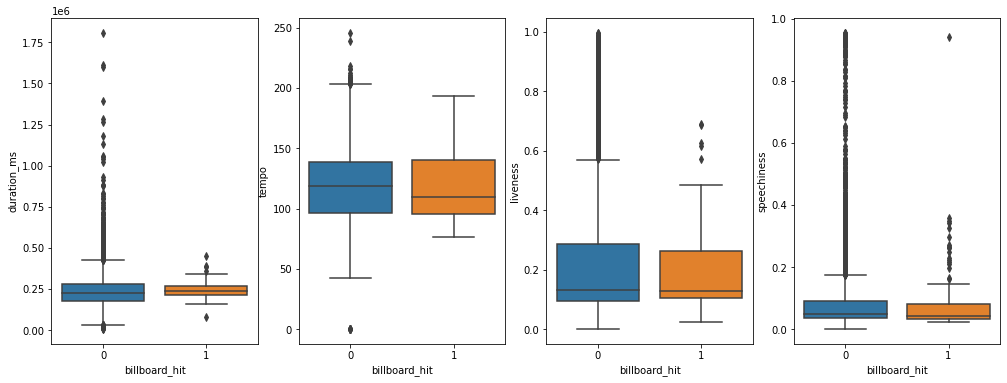

In [ ]:
f2,axes2=plt.subplots(ncols=4,figsize=(17,6))
sns.boxplot(x='billboard_hit',y='duration_ms',ax=axes2[0],data=msd)
sns.boxplot(x='billboard_hit',y='tempo',ax=axes2[1],data=msd)
sns.boxplot(x='billboard_hit',y='liveness',ax=axes2[2],data=msd)
sns.boxplot(x='billboard_hit',y='speechiness',ax=axes2[3],data=msd)

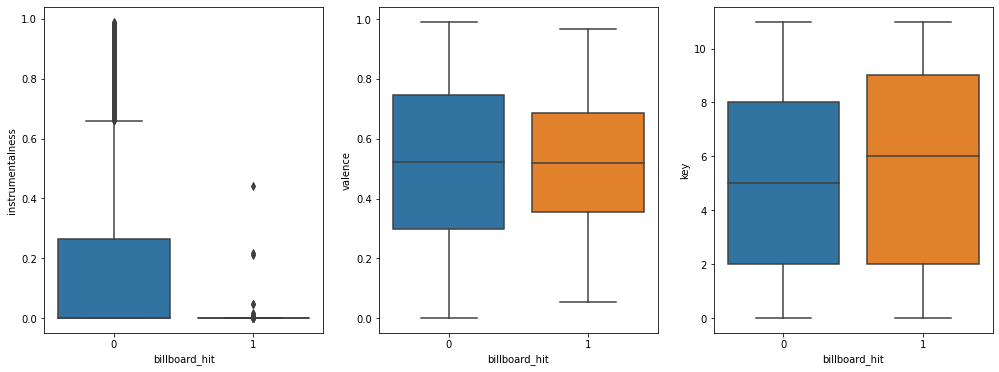

In [ ]:
f3,axes3=plt.subplots(ncols=3,figsize=(17,6))
sns.boxplot(x='billboard_hit',y='instrumentalness',ax=axes3[0],data=msd)
sns.boxplot(x='billboard_hit',y='valence',ax=axes3[1],data=msd)
sns.boxplot(x='billboard_hit',y='key',ax=axes3[2],data=msd)

In [ ]:
variables=msd[['danceability',           'energy',              'key',
               'loudness',             'mode',      'speechiness',
           'acousticness', 'instrumentalness',         'liveness',
                'valence',            'tempo',      'duration_ms']]
vif=pd.DataFrame()
df1=add_constant(variables)
vif["VIF"]=[variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif["features"]=df1.columns
vif

,VIF,features
0,97.792731,const
1,1.673971,danceability
2,3.882586,energy
3,1.023875,key
4,2.763392,loudness
5,1.038918,mode
6,1.165005,speechiness
7,2.185117,acousticness
8,1.282519,instrumentalness
9,1.144536,liveness


VIF for every features is checked and every features have a good vif score so that no features need to be dropped.

In [ ]:
billboard_Y=billboard['billboard_hit']
billboard_X=billboard.drop('billboard_hit',axis=1)

In [ ]:
msd=msd.drop(msd[msd['billboard_hit']==1].index,axis=0)
msd=msd.rename(columns={0:"Artist",1:"Album",2:"Track",3:"Year",4:"MS_ID",5:"SpotifyID"})
msd

,Artist,Album,Track,Year,MS_ID,SpotifyID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,billboard_hit
0,Sonora Santanera,Las Numero 1 De La Sonora Santanera,Amor De Cabaret,2016,TRAAADZ128F9348C2E,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.6760,102.463,183027,0
1,JennyAnyKind,I Need You,Young Boy Blues,2000,TRAAAVO128F93133D4,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.2030,146.609,218907,0
2,Casual,Fear Itself,I Didn't Mean To,1994,TRAAAAW128F429D538,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.5530,92.224,218933,0
3,Jeff And Sheri Easter,Ordinary Day,The Moon And I (Ordinary Day Album Version),2006,TRAAAMO128F1481E7F,7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.2860,147.565,267640,0
4,Tweeterfriendly Music,Gin & Phonic,Drop of Rain,2003,TRAAAPK128E0786D96,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.1850,100.315,189560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,David Arkenstone,Return Of The Guardians,The Forgotten Lands,1996,TRBIJIA128F425F57D,7xV2k7FEMtUT4IUu4L87it,0.562,0.525,9,-14.594,1,0.0283,0.456000,0.883000,0.3110,0.7130,141.957,314533,0
5599,Moonspell,Sin / Pecado,The Hanged Man,1998,TRBIJMU12903CF892B,3e0tyTV5FiV1bcYeRjdDz2,0.404,0.636,4,-8.798,0,0.0325,0.064300,0.653000,0.0795,0.0979,140.105,386333,0
5600,Seventh Day Slumber,Once Upon A Shattered Life,Shattered Life,2005,TRBIJYB128F14AE326,2CQwzG5nbS7ys8CHSlavVg,0.406,0.895,2,-5.282,0,0.0563,0.000429,0.000032,0.1200,0.2780,150.326,209693,0
5601,It Dies Today,Sirens,One the road (to Damnation),2006,TRBIJFB128F92ED124,0MS1NrmBWaCpPLFEXV0VMZ,0.329,0.963,4,-3.501,1,0.1450,0.000019,0.001380,0.2220,0.2050,116.847,179413,0


In [ ]:
msd=msd.drop(['Album','Year','MS_ID'],axis=1)
msd

,Artist,Track,SpotifyID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,billboard_hit
0,Sonora Santanera,Amor De Cabaret,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.6760,102.463,183027,0
1,JennyAnyKind,Young Boy Blues,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.2030,146.609,218907,0
2,Casual,I Didn't Mean To,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.5530,92.224,218933,0
3,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.2860,147.565,267640,0
4,Tweeterfriendly Music,Drop of Rain,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.1850,100.315,189560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5598,David Arkenstone,The Forgotten Lands,7xV2k7FEMtUT4IUu4L87it,0.562,0.525,9,-14.594,1,0.0283,0.456000,0.883000,0.3110,0.7130,141.957,314533,0
5599,Moonspell,The Hanged Man,3e0tyTV5FiV1bcYeRjdDz2,0.404,0.636,4,-8.798,0,0.0325,0.064300,0.653000,0.0795,0.0979,140.105,386333,0
5600,Seventh Day Slumber,Shattered Life,2CQwzG5nbS7ys8CHSlavVg,0.406,0.895,2,-5.282,0,0.0563,0.000429,0.000032,0.1200,0.2780,150.326,209693,0
5601,It Dies Today,One the road (to Damnation),0MS1NrmBWaCpPLFEXV0VMZ,0.329,0.963,4,-3.501,1,0.1450,0.000019,0.001380,0.2220,0.2050,116.847,179413,0


In [ ]:
track=billboard['Track']
billboard=billboard.drop(['Track'],axis=1)
track

0                Lucid Dreams
1                  Better Now
2               Drip Too Hard
3                  Sicko Mode
4                  Youngblood
                ...          
9324              Me So Horny
9325          Pump Up The Jam
9326    Got To Have Your Love
9327                 All Nite
9328        The Arms Of Orion
Name: Track, Length: 9178, dtype: object

In [ ]:
billboard.insert(1,'Track',track,True)
billboard

,Artist,Track,SpotifyID,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,loudness,billboard_hit
0,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,239836,-7.230,1
1,Post Malone,Better Now,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,231267,-5.804,1
2,Lil Baby & Gunna,Drip Too Hard,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,0,0.2920,0.08520,0.000000,0.5340,0.389,112.511,145543,-6.903,1
3,Travis Scott,Sicko Mode,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820,-3.714,1
4,5 Seconds Of Summer,Youngblood,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418,-5.114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,The 2 Live Crew,Me So Horny,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,1,1,0.0986,0.00336,0.000500,0.0833,0.949,132.737,260441,-11.157,1
9325,Technotronic Featuring Felly,Pump Up The Jam,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,10,0,0.1150,0.02390,0.000000,0.0491,0.675,124.810,215040,-7.375,1
9326,Mantronix Featuring Wondress,Got To Have Your Love,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,10,0,0.0753,0.17900,0.001070,0.0497,0.960,105.632,383333,-13.669,1
9327,Entouch Featuring Keith Sweat,All Nite,6q989QMsV87X9Em9J6DONi,0.834,0.485,11,1,0.0453,0.04780,0.000051,0.1030,0.929,107.598,368467,-13.040,1


In [ ]:
loudness=billboard['loudness']
billboard=billboard.drop(['loudness'],axis=1)

In [ ]:
billboard.insert(6,'loudness',loudness,True)
billboard

,Artist,Track,SpotifyID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,billboard_hit
0,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,0.511,0.566,6,-7.230,0,0.2000,0.34900,0.000000,0.3400,0.218,83.903,239836,1
1,Post Malone,Better Now,7dt6x5M1jzdTEt8oCbisTK,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.341,145.038,231267,1
2,Lil Baby & Gunna,Drip Too Hard,78QR3Wp35dqAhFEc2qAGjE,0.897,0.662,1,-6.903,0,0.2920,0.08520,0.000000,0.5340,0.389,112.511,145543,1
3,Travis Scott,Sicko Mode,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820,1
4,5 Seconds Of Summer,Youngblood,2iUXsYOEPhVqEBwsqP70rE,0.596,0.854,7,-5.114,0,0.4630,0.01690,0.000000,0.1240,0.152,120.274,203418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,The 2 Live Crew,Me So Horny,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,1,-11.157,1,0.0986,0.00336,0.000500,0.0833,0.949,132.737,260441,1
9325,Technotronic Featuring Felly,Pump Up The Jam,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,10,-7.375,0,0.1150,0.02390,0.000000,0.0491,0.675,124.810,215040,1
9326,Mantronix Featuring Wondress,Got To Have Your Love,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,10,-13.669,0,0.0753,0.17900,0.001070,0.0497,0.960,105.632,383333,1
9327,Entouch Featuring Keith Sweat,All Nite,6q989QMsV87X9Em9J6DONi,0.834,0.485,11,-13.040,1,0.0453,0.04780,0.000051,0.1030,0.929,107.598,368467,1


**Merging both the data and getting final data**

In [ ]:
df_final = pd.concat([msd,billboard]).drop_duplicates(subset="SpotifyID", keep="last")
df_final=df_final.reset_index(drop=True)
df_final

,Artist,Track,SpotifyID,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,billboard_hit
0,Sonora Santanera,Amor De Cabaret,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,8,-6.422,1,0.0290,0.689000,0.000471,0.9350,0.676,102.463,183027,0
1,JennyAnyKind,Young Boy Blues,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,5,-9.159,0,0.0495,0.000055,0.000768,0.0988,0.203,146.609,218907,0
2,Casual,I Didn't Mean To,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,6,-10.508,0,0.4290,0.063000,0.000025,0.1060,0.553,92.224,218933,0
3,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,5,-8.328,1,0.0325,0.706000,0.000005,0.0833,0.286,147.565,267640,0
4,Tweeterfriendly Music,Drop of Rain,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,7,-10.716,1,0.0352,0.553000,0.000116,0.0963,0.185,100.315,189560,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,The 2 Live Crew,Me So Horny,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,1,-11.157,1,0.0986,0.003360,0.000500,0.0833,0.949,132.737,260441,1
14633,Technotronic Featuring Felly,Pump Up The Jam,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,10,-7.375,0,0.1150,0.023900,0.000000,0.0491,0.675,124.810,215040,1
14634,Mantronix Featuring Wondress,Got To Have Your Love,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,10,-13.669,0,0.0753,0.179000,0.001070,0.0497,0.960,105.632,383333,1
14635,Entouch Featuring Keith Sweat,All Nite,6q989QMsV87X9Em9J6DONi,0.834,0.485,11,-13.040,1,0.0453,0.047800,0.000051,0.1030,0.929,107.598,368467,1


In [ ]:
df_final['SpotifyID'].value_counts()

6rBYFRTAcDUALC8JoFIJlk    1
7i2DJ88J7jQ8K7zqFX2fW8    1
41pD2smhxuZedl7361KsK0    1
0SMkzFGJOBFDI9KfYD55L0    1
65Jn2gZWMren03Rz0fCMqs    1
                         ..
7c4hMMfGxu2CZqNJlaz7un    1
3B6MzBBeXsTI4GURPavO1s    1
5GTGN8GMeKNAQoGp5bWFrs    1
7623p8KZ24WTeO0NeIb4tV    1
6YsCavQbx3YITYsnIKvF3j    1
Name: SpotifyID, Length: 14637, dtype: int64

**EDA and Feature Engineering**

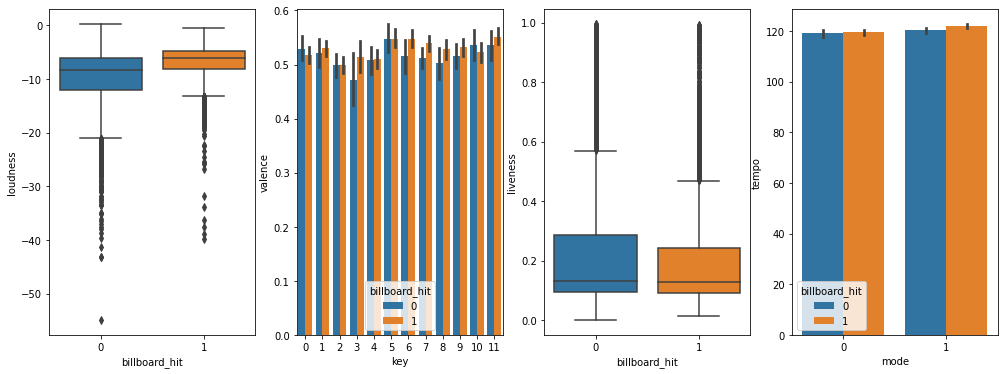

In [ ]:
f2,axes2=plt.subplots(ncols=4,figsize=(17,6))
sns.boxplot(x='billboard_hit',y='loudness',ax=axes2[0],data=df_final)
sns.barplot(x='key',y='valence',hue='billboard_hit',ax=axes2[1],data=df_final)
sns.boxplot(x='billboard_hit',y='liveness',ax=axes2[2],data=df_final)
sns.barplot(x='mode',y='tempo',hue='billboard_hit',ax=axes2[3],data=df_final)

We could see the relationship between 3 features(key,valence,billboard_hit) from the 2nd plot and similarly in 4th plot with different features. We could see from these of how 2 features combined can influence the billboard_hit column. We could see that if the key is high and valence is also high there is a high chance of it being a billboard hit.

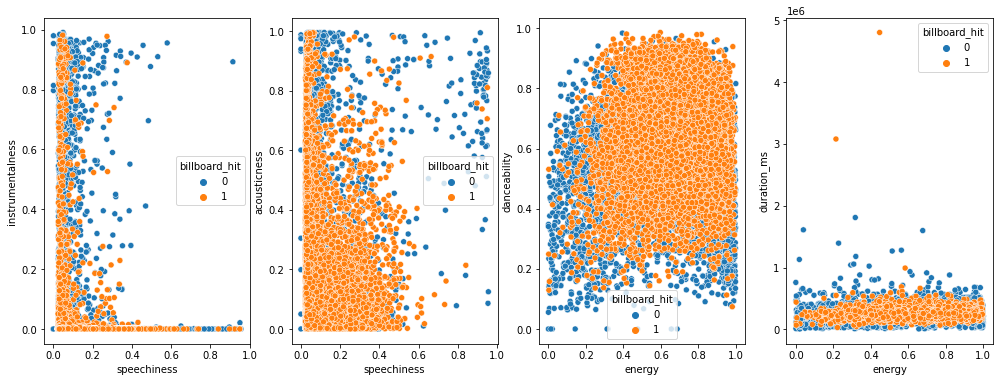

In [ ]:
f3,axes3=plt.subplots(ncols=4,figsize=(17,6))
sns.scatterplot(x=df_final['speechiness'],y=df_final['instrumentalness'],hue=df_final['billboard_hit'],ax=axes3[0])
sns.scatterplot(x=df_final['speechiness'],y=df_final['acousticness'],hue=df_final['billboard_hit'],ax=axes3[1])
sns.scatterplot(x=df_final['energy'],y=df_final['danceability'],hue=df_final['billboard_hit'],ax=axes3[2])
sns.scatterplot(x=df_final['energy'],y=df_final['duration_ms'],hue=df_final['billboard_hit'],ax=axes3[3])

With these scatterplots also we see the same of how any 2 features affect the target feature. For example in 3rd plot we infer that if the energy and danceability both are high then the song is definitely a billboard hit. And if the speechiness is low then the song will be a billboard hit. Like this we can infer from the other graphs too.

In [ ]:
df_X=df_final.drop(['billboard_hit'],axis=1)
df_Y=df_final['billboard_hit']

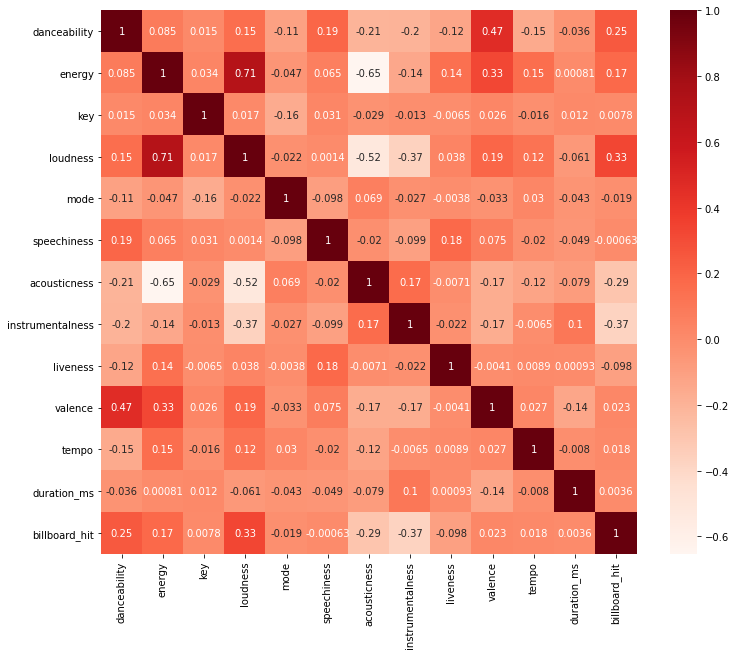

In [ ]:
plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

We can see that every column has a reasonably good correlation with target feature and so there is no need of dropping any column.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df_X.drop(['Track','Artist','SpotifyID'],axis=1), df_Y)
mi_scores

duration_ms         2.193648
acousticness        0.082853
instrumentalness    0.080352
loudness            0.066592
energy              0.046850
danceability        0.037738
valence             0.017548
tempo               0.016620
liveness            0.012865
speechiness         0.009537
mode                0.004423
key                 0.000000
Name: MI Scores, dtype: float64

We can see that MI score of key is 0 and the column does not affect the target variable. So, we should be doing some feature engineering to make the feature useful and to improve the accuracy.

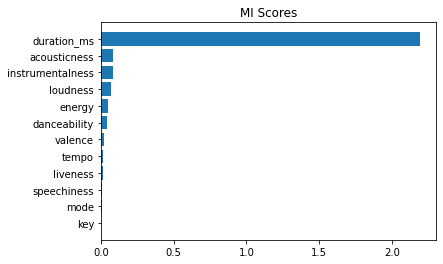

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("MI Scores")
plot_mi_scores(mi_scores)

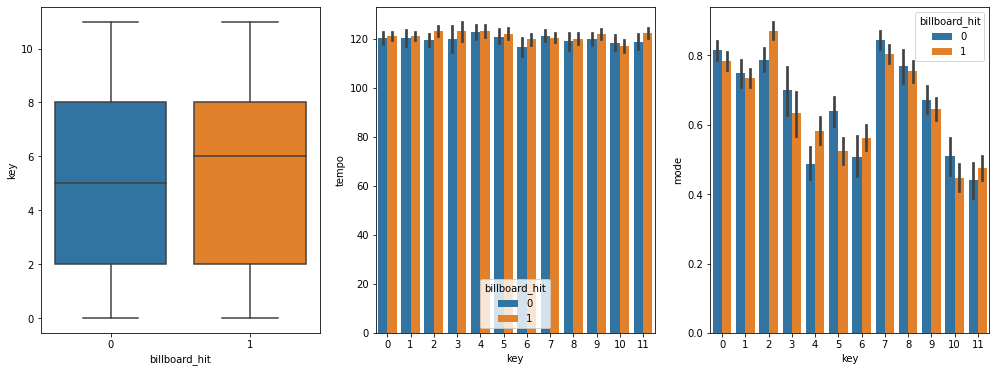

In [ ]:
f2,axes2=plt.subplots(ncols=3,figsize=(17,6))
sns.boxplot(x='billboard_hit',y='key',ax=axes2[0],data=df_final)
sns.barplot(x='key',y='tempo',hue='billboard_hit',ax=axes2[1],data=df_final)
sns.barplot(x='key',y='mode',hue='billboard_hit',ax=axes2[2],data=df_final)

After visualizing the key feature we could see that it has not much affected the target variable as in box plot for every key values it can be either 1 or 0.

In [ ]:
df_final.to_csv(r'final_data.csv', index=None)

In [ ]:
lst=[]
for i in df_final.index:
  if df_final['mode'][i]==0:
    lst.append(0.0)
  else:
    lst.append(df_final['key'][i]/df_final['mode'][i])
df_final.insert(14,"Key_mode_Ratio",lst,True)
df_final['Key_mode_Ratio'].fillna(df_final['Key_mode_Ratio'].mean(),inplace=True)

In [ ]:
df_final=df_final.drop("key",axis=1)
df_final=df_final.drop("mode",axis=1)

In [ ]:
df_final['duration_ms']=np.log(df_final['duration_ms'])
df_final

,Artist,Track,SpotifyID,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Key_mode_Ratio,duration_ms,billboard_hit
0,Sonora Santanera,Amor De Cabaret,5JeyXbf7CrVQ8DqwFikN0P,0.699,0.519,-6.422,0.0290,0.689000,0.000471,0.9350,0.676,102.463,8.0,12.117389,0
1,JennyAnyKind,Young Boy Blues,5uN6oY2NGLC6GKoywHKkZA,0.458,0.570,-9.159,0.0495,0.000055,0.000768,0.0988,0.203,146.609,0.0,12.296402,0
2,Casual,I Didn't Mean To,01TR6aAKrA2cI3Z0gnCOsu,0.751,0.549,-10.508,0.4290,0.063000,0.000025,0.1060,0.553,92.224,0.0,12.296521,0
3,Jeff And Sheri Easter,The Moon And I (Ordinary Day Album Version),7ERvcsBBYzSHqQQqlI9xAN,0.456,0.472,-8.328,0.0325,0.706000,0.000005,0.0833,0.286,147.565,5.0,12.497398,0
4,Tweeterfriendly Music,Drop of Rain,6dfppQDZQ4x3fCs6N89kV3,0.498,0.300,-10.716,0.0352,0.553000,0.000116,0.0963,0.185,100.315,7.0,12.152461,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14632,The 2 Live Crew,Me So Horny,6rQ9ypCfSRZs2AqqobvXu3,0.893,0.523,-11.157,0.0986,0.003360,0.000500,0.0833,0.949,132.737,1.0,12.470132,1
14633,Technotronic Featuring Felly,Pump Up The Jam,0UAEHlFR79k9CJvknSGUNf,0.867,0.911,-7.375,0.1150,0.023900,0.000000,0.0491,0.675,124.810,0.0,12.278579,1
14634,Mantronix Featuring Wondress,Got To Have Your Love,7MZzwdBfX8Dq0xFLFfxtdJ,0.763,0.505,-13.669,0.0753,0.179000,0.001070,0.0497,0.960,105.632,0.0,12.856659,1
14635,Entouch Featuring Keith Sweat,All Nite,6q989QMsV87X9Em9J6DONi,0.834,0.485,-13.040,0.0453,0.047800,0.000051,0.1030,0.929,107.598,11.0,12.817106,1


In [ ]:
df_X=df_final.drop(['billboard_hit','Track','Artist','SpotifyID'],axis=1)
df_Y=df_final['billboard_hit']

In [ ]:
mi_scores2 = make_mi_scores(df_X, df_Y)
mi_scores2

instrumentalness    0.085348
acousticness        0.077405
loudness            0.063528
duration_ms         0.060476
energy              0.045490
danceability        0.031767
tempo               0.016378
valence             0.015816
speechiness         0.009777
Key_mode_Ratio      0.008025
liveness            0.000000
Name: MI Scores, dtype: float64

In [ ]:
df_final.to_csv(r'final_data1.csv', index=None)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df_X)
X_pca = pca.transform(df_X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_pca, df_Y, test_size=0.2, random_state=101)

In [ ]:
s_scaler=StandardScaler()
X_train=s_scaler.fit_transform(X_train.astype(np.float))
X_test=s_scaler.transform(X_test.astype(np.float))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forestVC=RandomForestClassifier(random_state=1,n_estimators=950,max_depth=20,min_samples_split=5,min_samples_leaf = 1,max_features="sqrt") 
modelVC=forestVC.fit(X_train, Y_train) 
y_predVC=modelVC.predict(X_test)
print("Accuracy:",accuracy_score(y_predVC,Y_test)*100)

Accuracy: 80.63524590163934


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df_X, df_Y, test_size=0.2, random_state=101)

In [ ]:
s_scaler=StandardScaler()
X_train=s_scaler.fit_transform(X_train.astype(np.float))
X_test=s_scaler.transform(X_test.astype(np.float))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 900, stop = 970, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(8, 21, num = 3)]
max_depth.append(None)
min_samples_split = [1,3,5]
min_samples_leaf = [2,4,7]
bootstrap = [True, False]
random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,Y_train)
y_pred3=rf_random.predict(X_test)
print("Accuracy:",accuracy_score(y_pred3,Y_test)*100)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 12.5min finished


Accuracy: 80.9084699453552


In [ ]:
forestVC=RandomForestClassifier(random_state=1,n_estimators=950,max_depth=20,min_samples_split=5,min_samples_leaf = 1,max_features="sqrt") 
modelVC=forestVC.fit(X_train, Y_train) 
y_predVC2=modelVC.predict(X_test)
print("Accuracy:",accuracy_score(y_predVC2,Y_test)*100)

Accuracy: 81.31830601092896


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predVC2,Y_test)

array([[ 708,  163],
       [ 384, 1673]])

We have got 81.3% as best accuracy for Random Forest model.